In [168]:
from ultralytics import YOLO
import os
# Load a model
# model = YOLO("./snak/runs/detect/train7/args.yaml")  # build a new model from scratch

model = YOLO("../yolo/runs/detect/train7/weights/best.pt")
# - Between-eyebrows
# - Chin
# - Forehead
# - Left-cheek
# - Left-eye
# - Mouth
# - Nose
# - Right-cheek
# - Right-eye
names=  model.names
results = model.predict('./botox_with bunny line/true/image_4.jpg',save=True,conf=0.8)
import matplotlib.pyplot as plt
plots = results[0].plot()
boxes = results[0].boxes
for box in boxes :
    conf = box.conf.cpu().detach().numpy().tolist()
    if conf[0] >0.6:
        print(box.xyxy.cpu().detach().numpy().tolist())
        print(conf)
        print([names[x] for x in box.cls.cpu().detach().numpy().tolist()])
    # print(model.label)


image 1/1 c:\Users\kihoon\Desktop\AI\skin_care\dataset\botox_with bunny line\true\image_4.jpg: 352x640 1 Between-eyebrows, 2 Mouths, 2 Noses, 2 Right-eyes, 17.1ms
Speed: 3.7ms preprocess, 17.1ms inference, 4.3ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs\detect\predict46


[[57.899925231933594, 296.7436218261719, 253.38510131835938, 370.021728515625]]
[0.8966864943504333]
['Mouth']
[[490.6762390136719, 45.678428649902344, 564.5610961914062, 177.1463623046875]]
[0.8828907608985901]
['Between-eyebrows']
[[450.14776611328125, 190.6983642578125, 600.8339233398438, 300.2555847167969]]
[0.8560051918029785]
['Nose']
[[211.6768341064453, 54.03655242919922, 348.346923828125, 172.3059844970703]]
[0.8545651435852051]
['Right-eye']
[[449.634521484375, 312.1937255859375, 623.7979125976562, 369.4613952636719]]
[0.8324509263038635]
['Mouth']
[[68.79194641113281, 188.8796844482422, 250.8856658935547, 292.7882385253906]]
[0.830643892288208]
['Nose']
[[568.2163696289062, 49.677734375, 699.9488525390625, 167.39288330078125]]
[0.8161011338233948]
['Right-eye']


In [162]:
def face_region_counts(image_path):
    results = model.predict(image_path,conf=0.8)
    new_dict= {x:[] for x in range(len(names))}
    boxes = results[0].boxes
    for box in boxes:
        conf = box.conf.cpu().detach().numpy().tolist()
        index=  box.cls.cpu().detach().numpy().tolist()[0]
        new_dict[index].append(box.xyxy.cpu().detach().numpy().tolist()[0])
        # new_dict[)
        # print(conf)
        # print([names[x] for x in box.cls.cpu().detach().numpy().tolist()])
    check=False
    remove_columns = []
    for new in new_dict:
        if len(new_dict[new])<2:
            remove_columns.append(new)
        else:
            check=True
    for remove in remove_columns:
        del(new_dict[remove])
    
    if not check:
        return False
    return new_dict
# 얼굴 인식 함수
import cv2
# 얼굴 인식
def split_face(file_path):
    image = cv2.imread(file_path)
    h,w,c = image.shape
    check = face_region_counts(file_path)
    # filename = file_path.split('\\')[-1]
    # file_path= "_".join(file_path.split('\\')[0].split(' '))
    # # Find the position of the border
    # if not os.path.exists(os.path.join('./data',file_path)):
    #     os.mkdir(os.path.join('./data',file_path))
    # if not os.path.exists(os.path.join('./data',file_path,'before')):
    #     os.mkdir(os.path.join('./data',file_path,'before'))
    # if not os.path.exists(os.path.join('./data',file_path,'after')):
    #     os.mkdir(os.path.join('./data',file_path,'after'))
    
    # top_image_path =  f'./data\\{file_path}\\before\\{filename}'
    # bottom_image_path = f'./data\\{file_path}\\after\\{filename}'
    slice_horizon =  0 # 수평
    slice_verticle = 0  #수직 
    print(check)
    if not check:
        return None
    else:
        for region in check:
            print("REGION",region)
            print(slice_horizon,slice_verticle)
            checking_x_y = [0,0,0,0]
            faces =  check[region]  
            center_faces= []
            for face in faces:
                mid_x,mid_y = (face[0]+face[2])/2,(face[1]+face[3])/2
                center_faces.append([mid_x,mid_y])
            center_faces.sort()
            min_x,max_x = center_faces[0][0],center_faces[-1][0]
            center_faces.sort(key=lambda x:x[1])
            min_y,max_y = center_faces[0][1],center_faces[-1][1]
            print(center_faces)
            print(min_x,min_y,max_x,max_y)
            print("x :",max_x-min_x,"y :",max_y-min_y)
            if max_x-min_x >max_y-min_y:
                if region==2 or region==6:
                    slice_verticle+=4
                else:
                    slice_verticle+=1
            else:
                if region==2 or region==6:
                    slice_horizon+=4
                else:   
                    slice_horizon+=1
    print(slice_horizon>slice_verticle)
    if slice_verticle > slice_horizon:
       return '양옆으로 잘라라'
    else :
        return '위아래로으로 잘라라'
   

In [167]:
split_face('./botox_with bunny line/true/image_4.jpg')


image 1/1 c:\Users\kihoon\Desktop\AI\skin_care\dataset\botox_with bunny line\true\image_4.jpg: 352x640 1 Between-eyebrows, 2 Mouths, 2 Noses, 2 Right-eyes, 23.1ms
Speed: 0.0ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


{5: [[57.899925231933594, 296.7436218261719, 253.38510131835938, 370.021728515625], [449.634521484375, 312.1937255859375, 623.7979125976562, 369.4613952636719]], 6: [[450.14776611328125, 190.6983642578125, 600.8339233398438, 300.2555847167969], [68.79194641113281, 188.8796844482422, 250.8856658935547, 292.7882385253906]], 8: [[211.6768341064453, 54.03655242919922, 348.346923828125, 172.3059844970703], [568.2163696289062, 49.677734375, 699.9488525390625, 167.39288330078125]]}
REGION 5
0 0
[[155.64251327514648, 333.38267517089844], [536.7162170410156, 340.8275604248047]]
155.64251327514648 333.38267517089844 536.7162170410156 340.8275604248047
x : 381.07370376586914 y : 7.44488525390625
REGION 6
0 1
[[159.83880615234375, 240.8339614868164], [525.4908447265625, 245.4769744873047]]
159.83880615234375 240.8339614868164 525.4908447265625 245.4769744873047
x : 365.65203857421875 y : 4.643013000488281
REGION 8
0 5
[[634.0826110839844, 108.53530883789062], [280.01187896728516, 113.1712684631347

'양옆으로 잘라라'

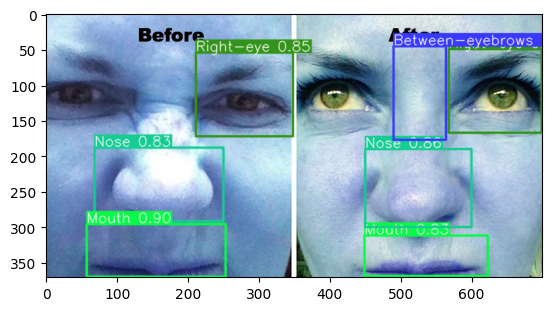

In [169]:
plots = results[0].plot()
plt.imshow(plots)

In [43]:
names

{0: 'Between-eyebrows',
 1: 'Chin',
 2: 'Forehead',
 3: 'Left-cheek',
 4: 'Left-eye',
 5: 'Mouth',
 6: 'Nose',
 7: 'Right-cheek',
 8: 'Right-eye'}

In [93]:
a= [1,2,3,4,10,5,6]
a.sort()

In [95]:
a.sort(key=lambda x:x[1])

TypeError: 'int' object is not subscriptable

In [44]:
for x in names.values():
    print(x)

Between-eyebrows
Chin
Forehead
Left-cheek
Left-eye
Mouth
Nose
Right-cheek
Right-eye
